In [2]:
import numpy as np
import matplotlib.pyplot as plt
from base import *
import nibabel as nb

In [3]:
##Try to load Miccai2016 data

In [50]:
name = "../data/miccai2016/Preprocessed_training_dataset/s4/FLAIR_preprocessed_downsampled.nii.gz"
flair = load_nii(name).get_fdata()
affine = load_nii(name).affine

In [51]:
flair.shape

(144, 256, 256)

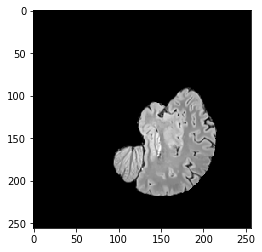

In [52]:
n = 100
plt.imshow(flair[n,:,:], cmap='gray')

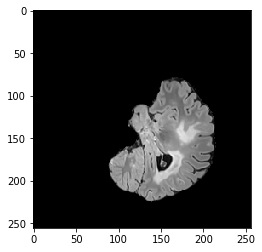

In [25]:
from skimage.measure import block_reduce
flair_reduced = block_reduce(flair, block_size=(1, 2, 2), func=np.mean)
plt.imshow(flair_reduced[n,:,:], cmap='gray')

In [18]:
flair_reduced.shape

(131, 168, 168)

In [31]:
new_image = nib.Nifti1Image(flair_reduced, affine)
new_fn = "../data/miccai2016/Preprocessed_training_dataset/s1/FLAIR_preprocessed_downsampled.nii.gz"
nb.save(new_image,new_fn)

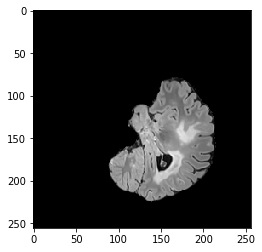

In [32]:
new_flair = load_nii(new_fn).get_fdata()
plt.imshow(new_flair[n,:,:], cmap='gray')

## Downsample 3T images

In [40]:
train_folder = "../data/miccai2016/Preprocessed_training_dataset/"
train_mask_folder = '../data/miccai2016/Unprocessed_training_dataset/TrainingDataset_MSSEG/'
for i in range (5):
    subj_name = 's' + str(i+1)
    paths = []
    paths.append( train_folder + subj_name + '/FLAIR_preprocessed.nii.gz')
    paths.append( train_folder + subj_name + '/T1_preprocessed.nii.gz')
    paths.append( train_folder + subj_name + '/T2_preprocessed.nii.gz')
    y_path = train_mask_folder + subj_name +  '/Consensus.nii.gz'
    for path in paths:
        image = load_nii(path).get_fdata()
        affine = load_nii(path).affine
        fn = path.split('.')[2]
        im_reduced = block_reduce(image, block_size=(1, 2, 2), func=np.mean)
        new_image = nib.Nifti1Image(im_reduced, affine)
        new_fn = ".." + fn + "_downsampled.nii.gz"
        nb.save(new_image,new_fn)
    image = load_nii(y_path).get_fdata()
    affine = load_nii(y_path).affine
    fn = y_path.split('.')[2]
    im_reduced = block_reduce(image, block_size=(1, 2, 2), func=np.mean)
    new_image = nib.Nifti1Image(im_reduced, affine)
    new_fn = ".." + fn + "_downsampled.nii.gz"
    nb.save(new_image,new_fn)

In [39]:
y_path.split('.')[2]

'/data/miccai2016/Unprocessed_training_dataset/TrainingDataset_MSSEG/s5/Consensus'

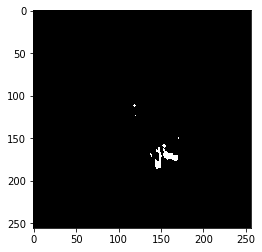

In [55]:
name = "../data/miccai2016/Unprocessed_training_dataset/TrainingDataset_MSSEG/s3/Consensus_downsampled.nii.gz"
labels = load_nii(name).get_fdata().astype(dtype=np.bool)
plt.imshow(labels[n,:,:], cmap='gray')

0


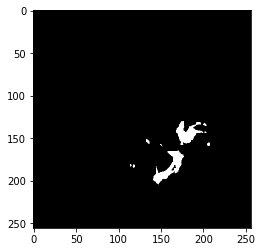

In [29]:
labels_reduced = block_reduce(labels, block_size=(1, 2, 2), func=np.mean)
plt.imshow(labels_reduced[n,:,:], cmap='gray')
print(np.sum(labels==0.5))

## Check accuracy results

(128, 224, 256)


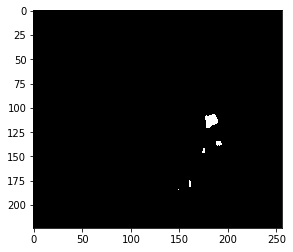

In [24]:
#Load labels
n = 50
name = "../data/miccai2016/Unprocessed_training_dataset/TrainingDataset_MSSEG/s10/Consensus.nii.gz"
labels = load_nii(name).get_fdata().astype(dtype=np.bool)
plt.imshow(labels[n,:,:], cmap='gray')
print(labels.shape)

In [20]:
my_seg = np.load('../results/s15_output_segmentation.npy')
my_seg.shape

(128, 224, 256)

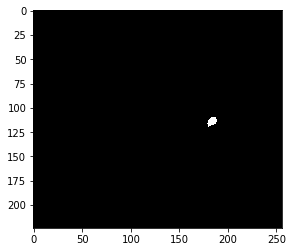

In [25]:
plt.imshow(my_seg[n,:,:], cmap='gray')

In [27]:
from metrics import *
DSC(my_seg,labels)

0.5957508520049307

In [28]:
vol_dif(my_seg,labels)

0.9818378378378378

In [42]:
#True positive rate
np.sum(np.logical_and(my_seg,labels))/np.sum(labels)

0.4481780493126773

In [43]:
#PPV
np.sum(np.logical_and(my_seg,labels))/np.sum(my_seg)

0.8882162162162163

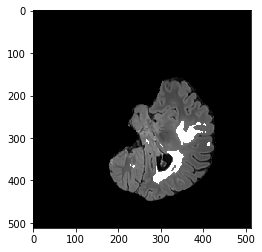

In [115]:
img = flair[n,:,:]
label = labels[n,:,:]
img[label] = 255
plt.imshow(img, cmap='gray')

In [95]:
#ISBI 2015 data
name = '../data/isbi2015/training_final_v4/training/training01/preprocessed/training01_02_flair_pp.nii'
flair = load_nii(name).get_fdata()
flair.shape

(181, 217, 181)

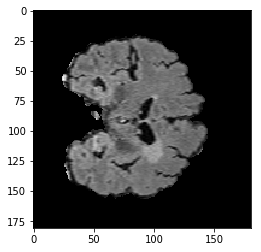

In [96]:
plt.imshow(flair[:,100,:], cmap='gray')

14981


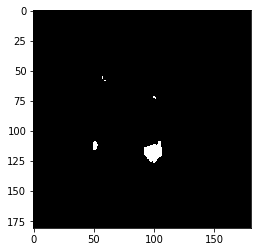

In [97]:
name = '../data/isbi2015/training_final_v4/training/training01/masks/training01_02_mask1.nii'
labels = load_nii(name).get_fdata()
plt.imshow(labels[:,100,:], cmap='gray')
print(np.sum(labels==1))

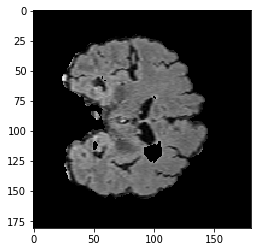

In [98]:
img = flair[:,n,:]
labels = labels[:,n,:]
img[labels==1] = 255
plt.imshow(img, cmap='gray')

In [99]:
name = '../data/miccai2008/CHB_test1_Part2/CHB_test1_Case07/CHB_test1_Case07_FLAIR.nhdr'

In [100]:
f = open(name, 'r')
data = f.read()
print (data)

NRRD0004
# Complete NRRD file format specification at:
# http://teem.sourceforge.net/nrrd/format.html
type: short
dimension: 3
space dimension: 3
sizes: 512 512 512
space directions: (0.5,0,0) (0,0.5,0) (0,0,0.5)
kinds: domain domain domain
endian: little
encoding: raw
space origin: (0,0,0)
data file: CHB_test1_Case07_FLAIR.raw



In [101]:
name = '../data/miccai2008/UNC_train_Part1/UNC_train_Case01/UNC_train_Case01_FLAIR.raw'
data = np.fromfile(name, dtype=np.int16)
data = data.reshape((512,512,512))

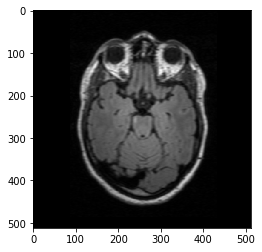

In [102]:
plt.imshow(data[185,:,:], cmap='gray')

In [103]:
name2 = '../data/miccai2008/UNC_train_Part1/UNC_train_Case01/UNC_train_Case01_lesion.raw'
data2 = np.fromfile(name2, dtype=np.int16)
data2 = data2.reshape((512,512,512))

7926


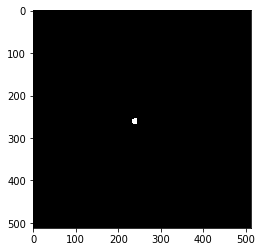

In [104]:
plt.imshow(data2[185,:,:], cmap='gray')
print(np.sum(data2==1))

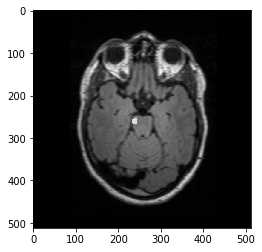

In [105]:
n=185
img = data[n,:,:]
label = data2[n,:,:]
img[label==1] = 255
plt.imshow(img, cmap='gray')